In [1]:
import pandas as pd
import dict_map as dm

df = pd.read_csv('Daten/trainingdata.csv',escapechar="\\",sep=",",error_bad_lines=False,warn_bad_lines=False)

token2idx, idx2token = dm.get_dict_map(df, 'token')
tag2idx, idx2tag = dm.get_dict_map(df, 'tag')

df['Word_idx'] = df['Wort'].map(token2idx)
df['Tag_idx'] = df['Attribut'].map(tag2idx)
#print(df)

df_group = df.groupby(by = ['satzId'], as_index=False)['Wort', 'Attribut', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
#df_group

<ipython-input-1-7ccc670b1f52>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df.groupby(by = ['satzId'], as_index=False)['Wort', 'Attribut', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))


In [2]:
import pad_train_test as ptt
train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = ptt.get_pad_train_test_val(df_group, df, tag2idx)

train_tokens length: 10800 
train_tags length: 10800 
test_tokens length: 1601 
test_tags: 1601 
val_tokens: 3600 
val_tags: 3600


In [3]:
input_dim = len(list(set(df['Wort'].to_list())))+1
output_dim = 32
input_length = max([len(s) for s in df_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  51605 
output_dim:  32 
input_length:  963 
n_tags:  6


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 963, 32)           1651360   
_________________________________________________________________
bidirectional (Bidirectional (None, 963, 64)           16640     
_________________________________________________________________
lstm_1 (LSTM)                (None, 963, 32)           12416     
_________________________________________________________________
time_distributed (TimeDistri (None, 963, 6)            198       
Total params: 1,680,614
Trainable params: 1,680,614
Non-trainable params: 0
_________________________________________________________________


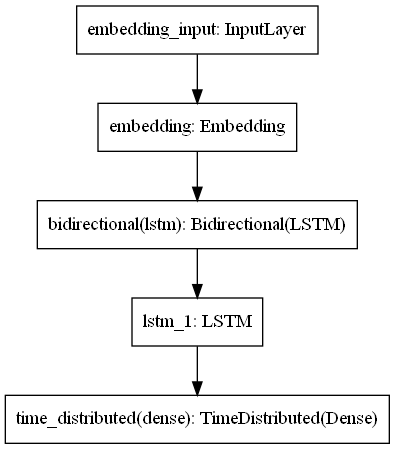

In [4]:
import model as md
#choco install graphviz, pip install pydot
from tensorflow.keras.utils import plot_model 
model_bilstm_lstm = md.get_bilstm_lstm_model(input_dim, output_dim, input_length, n_tags)
plot_model(model_bilstm_lstm)

In [5]:
import numpy as np
results = pd.DataFrame()
results['with_add_lstm'] = md.train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

In [2]:
import tensorflow as tf 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

True

In [3]:
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]